# Importing the data

In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

2.1.0


In [2]:
df = pd.read_csv('data','merged.csv')
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Ag0.1Cu0.9O4
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Cu1O4
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.15La1.85Cu1O4
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.3La1.7Cu1O4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Tm0.84Lu0.16Fe3Si5
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,Tl1Ba2Ca3Cu4O11
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Nb0.8Pd0.2
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Nb0.69Pd0.31


In [3]:
cols = [i for i in df.columns]
# cols

# Splitting the Data

In [4]:
X = df.drop(['critical_temp', 'material'], axis=1)
# X

In [5]:
y = df.critical_temp.values.reshape(-1,1)
# y

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test

# Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

r2_training = model_linear.score(X_train,y_train)
r2_testing = model_linear.score(X_test, y_test)

print(f'''
Training R^2 Scores: {round(100*r2_training,2)}%
Testing R^2 Scores:  {round(100*r2_testing,2)}%
''')


Training R^2 Scores: 76.42%
Testing R^2 Scores:  76.31%



# XGBoost

In [8]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

regressor = XGBRegressor()

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score = r2_score(y_test, y_pred)
score 

0.9254150975686546

# XGBoost with Gridsearch

In [9]:
# from sklearn.model_selection import GridSearchCV

# xgb1 = XGBRegressor()
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:linear'],
#               'learning_rate': [.03, 0.05, .07], #so called `eta` value
#               'max_depth': [5, 6, 7],
#               'min_child_weight': [4],
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [500]}

# xgb_grid = GridSearchCV(regressor,
#                         parameters,
#                         cv = 2,
#                         n_jobs = 5,
#                         verbose=True)

# xgb_grid.fit(X_train,
#          y_train)
# print('---------------------------------------------------------------------')
# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)

# TensorFlow Linear Regression Neural Network

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def model_and_evaluation(epochs, skip_epochs=0, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mae', 'mse'])

    print(model.summary())


    model.fit(
        X_train,
        y_train,
        epochs=epochs,
        batch_size=512,
        validation_split=0.1,
    )
    
    from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

    # MSE and r squared values
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
    print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
    print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
    print("Validation r2:", round(r2_score(y_test, y_test_pred),4))
    

    # Scatterplot of predicted vs. actual values
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
    plt.subplots_adjust(top=0.93, wspace=0)
    
    ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
    ax1.set_title('Test set')
    ax1.set_xlabel('Actual values')
    ax1.set_ylabel('Predicted values')
    
    ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
    ax2.set_title('Train set')
    ax2.set_xlabel('Actual values')
    ax2.set_ylabel('')
    ax2.set_yticklabels(labels='')
    
    plt.show()
    
    history = model.fit(
        X_train, 
        y_train, 
        epochs=epochs, 
        batch_size=512,
        validation_data=(X_test, y_test)
    )
    
    pd.DataFrame(history.history).plot(figsize=(15,7))
    plt.grid(True)
    plt.xlabel('Epochs')
    plt.ylabel('metric values')
    # plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
    plt.show()

Model Testing

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               21504     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1

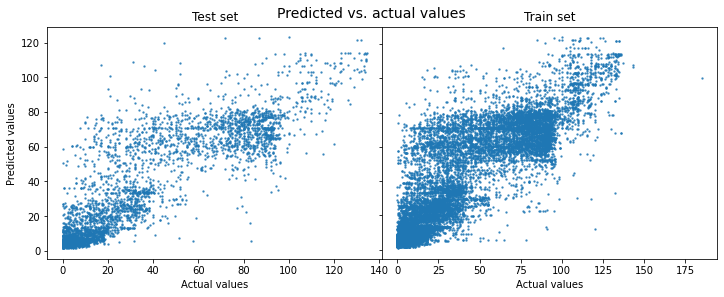

Train on 17010 samples, validate on 4253 samples
Epoch 1/10
17010/17010 [==============================] - 1s 84us/sample - loss: 297.5692 - mae: 11.7282 - mse: 297.5692 - val_loss: 301.4550 - val_mae: 11.9110 - val_mse: 301.4550
Epoch 2/10
17010/17010 [==============================] - 1s 83us/sample - loss: 299.3518 - mae: 11.7691 - mse: 299.3518 - val_loss: 258.6583 - val_mae: 10.9022 - val_mse: 258.6582
Epoch 3/10
17010/17010 [==============================] - 1s 83us/sample - loss: 282.8847 - mae: 11.3739 - mse: 282.8847 - val_loss: 286.0139 - val_mae: 11.5768 - val_mse: 286.0139
Epoch 4/10
17010/17010 [==============================] - 1s 83us/sample - loss: 275.3763 - mae: 11.2599 - mse: 275.3763 - val_loss: 292.9901 - val_mae: 11.7070 - val_mse: 292.9901
Epoch 5/10
17010/17010 [==============================] - 1s 85us/sample - loss: 281.1078 - mae: 11.2905 - mse: 281.1078 - val_loss: 259.9785 - val_mae: 10.8349 - val_mse: 259.9785
Epoch 6/10
17010/17010 [======================

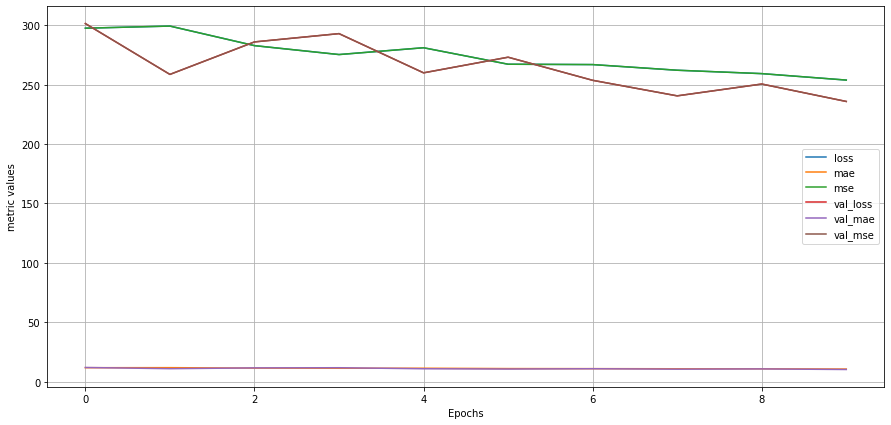

In [11]:
model_and_evaluation(epochs=10, skip_epochs=0, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

Model Evaluation

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               21504     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_13 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_17 (Dense)             (None, 1024)             

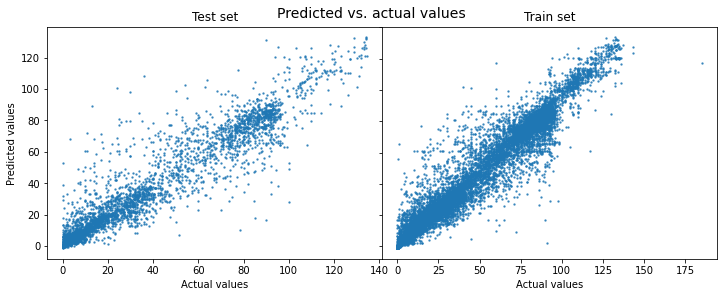

Train on 17010 samples, validate on 4253 samples
Epoch 1/1500
17010/17010 [==============================] - 1s 67us/sample - loss: 69.2482 - mae: 4.6751 - mse: 69.2482 - val_loss: 132.5777 - val_mae: 6.7637 - val_mse: 132.5777
Epoch 2/1500
17010/17010 [==============================] - 1s 69us/sample - loss: 76.3097 - mae: 4.9961 - mse: 76.3097 - val_loss: 114.3438 - val_mae: 6.1161 - val_mse: 114.3438
Epoch 3/1500
17010/17010 [==============================] - 1s 66us/sample - loss: 57.3387 - mae: 4.3183 - mse: 57.3387 - val_loss: 109.7857 - val_mae: 5.9633 - val_mse: 109.7857
Epoch 4/1500
17010/17010 [==============================] - 1s 66us/sample - loss: 53.0359 - mae: 4.0724 - mse: 53.0359 - val_loss: 109.4018 - val_mae: 5.9375 - val_mse: 109.4018
Epoch 5/1500
17010/17010 [==============================] - 1s 67us/sample - loss: 75.4577 - mae: 4.9245 - mse: 75.4577 - val_loss: 113.8466 - val_mae: 6.2212 - val_mse: 113.8465
Epoch 6/1500
17010/17010 [==============================

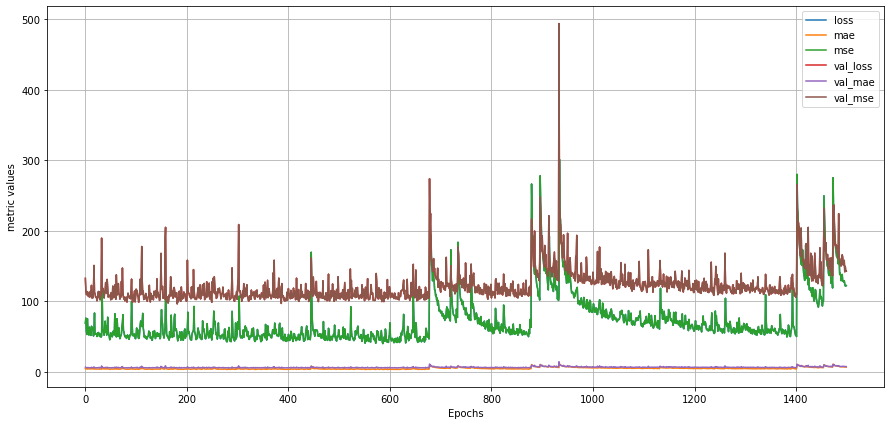

In [12]:
model_and_evaluation(epochs=1500, skip_epochs=0, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

# Tensorflow Linear Regression further experimentation

In [13]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(1024, activation='relu'),
        layers.Dense(1024, activation='relu'),
        layers.Dense(1024, activation='relu'),
        layers.Dense(2048, activation='relu'),
        layers.Dense(2048, activation='relu'),
        layers.Dense(4096, activation='relu'),
        layers.Dense(1, activation='linear')
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [14]:
model = build_model()

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                10752     
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_25 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_27 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_28 (Dense)             (None, 1024)             

In [16]:
EPOCHS = 1000

history = model.fit(
    X_train, 
    y_train,
    epochs=EPOCHS, 
    validation_split = 0.2, 
    verbose=0,
    callbacks=[tfdocs.modeling.EpochDots()]
)


Epoch: 0, loss:32778735.7524,  mae:297.0345,  mse:32778784.0000,  val_loss:2544.0735,  val_mae:40.3076,  val_mse:2544.0725,  
....................................................................................................
Epoch: 100, loss:355.3924,  mae:11.6119,  mse:355.3925,  val_loss:277.4468,  val_mae:11.1922,  val_mse:277.4467,  
....................................................................................................
Epoch: 200, loss:408.7272,  mae:10.3670,  mse:408.7273,  val_loss:266.9785,  val_mae:10.9035,  val_mse:266.9784,  
....................................................................................................
Epoch: 300, loss:1098.8224,  mae:28.2368,  mse:1098.8223,  val_loss:1097.4232,  val_mae:28.2274,  val_mse:1097.4231,  
....................................................................................................
Epoch: 400, loss:877.3593,  mae:22.6190,  mse:877.3598,  val_loss:916.0658,  val_mae:22.4236,  val_mse:916.0657,  
.....

In [17]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,876.636190,22.605932,876.636475,905.275143,22.620464,905.275208,995
996,876.162420,22.576200,876.162109,919.660025,22.435905,919.659729,996
997,876.479173,22.631685,876.479187,905.989800,22.639042,905.989929,997
998,876.079829,22.601706,876.079834,905.585244,22.856745,905.585022,998
999,876.781364,22.638060,876.781067,905.489512,23.179171,905.489502,999


In [18]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [Critical temp]')

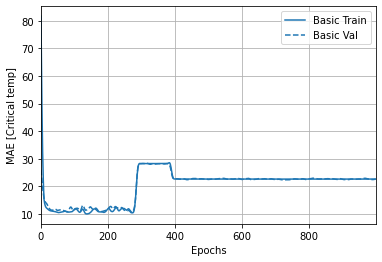

In [19]:
plotter.plot({'Basic': history}, metric = "mae")
# plt.ylim([0, 10])
plt.ylabel('MAE [Critical temp]')

Text(0, 0.5, 'MSE [Critical temp^2]')

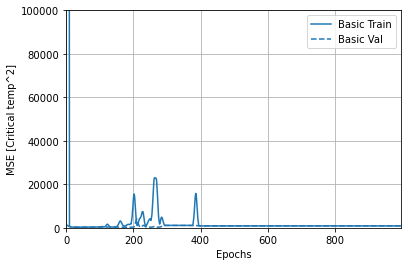

In [20]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 25000])
plt.ylabel('MSE [Critical temp^2]')

In [21]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:30562998.0570,  mae:285.5628,  mse:30563002.0000,  val_loss:2395.8853,  val_mae:34.6460,  val_mse:2395.8853,  
.................................................

Text(0, 0.5, 'MAE [Critical temp]')

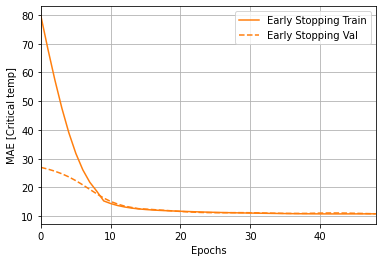

In [22]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
# plt.ylim([0, 10])
plt.ylabel('MAE [Critical temp]')

In [23]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Critical temp".format(mae))

4253/4253 - 0s - loss: 242.4265 - mae: 10.6101 - mse: 242.4265
Testing set Mean Abs Error: 10.61 Critical temp


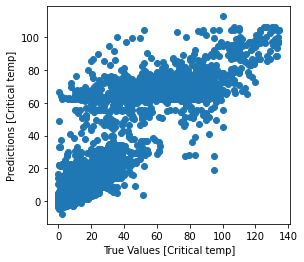

In [24]:
y_pred = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [Critical temp]')
plt.ylabel('Predictions [Critical temp]')
# lims = [0, 50]
# plt.xlim(lims)
# plt.ylim(lims)
_ = plt.plot()


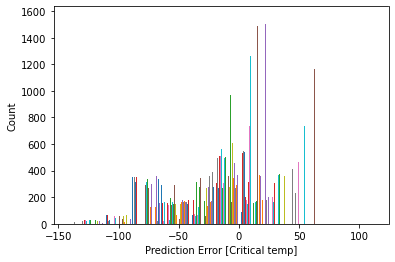

In [25]:
error = y_pred - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Critical temp]")
_ = plt.ylabel("Count")

# Tensorflow Linear Regression further experimentation, Adam Optimiser

In [38]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(1024, activation='relu'),
        layers.Dense(1024, activation='relu'),
        layers.Dense(1024, activation='relu'),
        layers.Dense(2048, activation='relu'),
        layers.Dense(2048, activation='relu'),
        layers.Dense(4096, activation='relu'),
        layers.Dense(1, activation='linear')
    ])

    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [39]:
model = build_model()

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 64)                10752     
_________________________________________________________________
dense_47 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_48 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_49 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_50 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_51 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_52 (Dense)             (None, 1024)             

In [41]:
EPOCHS = 1000

history = model.fit(
    X_train, 
    y_train,
    epochs=EPOCHS, 
    validation_split = 0.2, 
    verbose=0,
    callbacks=[tfdocs.modeling.EpochDots()]
)


Epoch: 0, loss:18431.7283,  mae:24.6131,  mse:18431.7188,  val_loss:571.3236,  val_mae:17.5124,  val_mse:571.3235,  
....................................................................................................
Epoch: 100, loss:228.2941,  mae:9.9026,  mse:228.2941,  val_loss:213.6637,  val_mae:9.7644,  val_mse:213.6637,  
....................................................................................................
Epoch: 200, loss:248.0458,  mae:10.4011,  mse:248.0459,  val_loss:247.5797,  val_mae:10.2223,  val_mse:247.5797,  
....................................................................................................
Epoch: 300, loss:237.1958,  mae:10.2050,  mse:237.1958,  val_loss:226.4709,  val_mae:10.2397,  val_mse:226.4709,  
....................................................................................................
Epoch: 400, loss:237.3911,  mae:10.1858,  mse:237.3911,  val_loss:220.2960,  val_mae:9.8228,  val_mse:220.2959,  
.....................

In [42]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,1105.632493,28.062160,1105.632568,1132.670717,28.224777,1132.670288,995
996,1105.453121,28.113567,1105.452637,1133.568637,28.079800,1133.568848,996
997,1105.843124,28.097075,1105.842773,1133.278704,28.157825,1133.278687,997
998,1105.594142,28.061333,1105.594238,1132.617074,28.324884,1132.616943,998
999,1105.962634,28.116447,1105.962524,1132.892852,28.229368,1132.892944,999


In [43]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [Critical temp]')

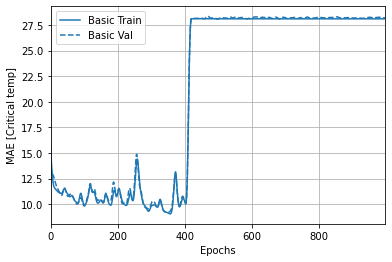

In [44]:
plotter.plot({'Basic': history}, metric = "mae")
# plt.ylim([0, 10])
plt.ylabel('MAE [Critical temp]')

Text(0, 0.5, 'MSE [Critical temp^2]')

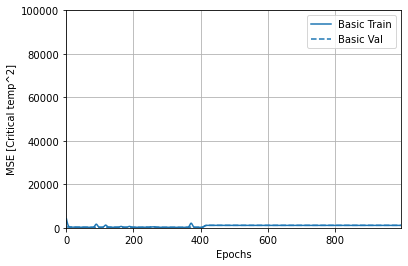

In [45]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 100000])
plt.ylabel('MSE [Critical temp^2]')

In [50]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:23304.0346,  mae:25.5332,  mse:23304.0195,  val_loss:886.1097,  val_mae:20.2202,  val_mse:886.1096,  
.......................

Text(0, 0.5, 'MAE [Critical temp]')

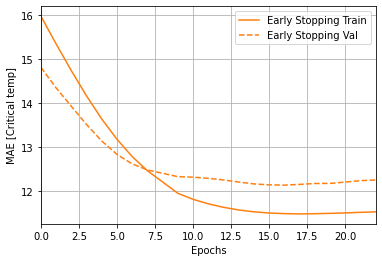

In [51]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
# plt.ylim([0, 10])
plt.ylabel('MAE [Critical temp]')

In [52]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Critical temp".format(mae))

4253/4253 - 0s - loss: 305.5410 - mae: 12.3919 - mse: 305.5410
Testing set Mean Abs Error: 12.39 Critical temp


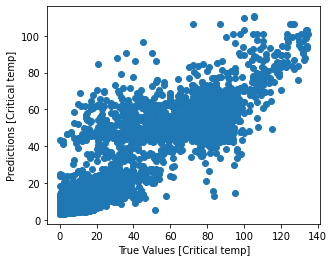

In [53]:
y_pred = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [Critical temp]')
plt.ylabel('Predictions [Critical temp]')
# lims = [0, 50]
# plt.xlim(lims)
# plt.ylim(lims)
_ = plt.plot()


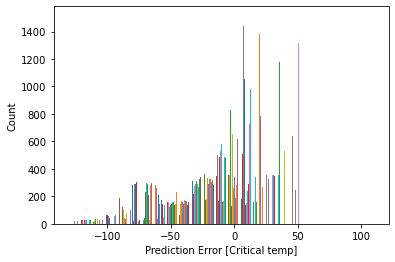

In [54]:
error = y_pred - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Critical temp]")
_ = plt.ylabel("Count")

# Optimising with TensorFlow (No longer using)

In [26]:
# from tensorflow import keras

In [27]:
# def build_model(n_hidden=10, n_neurons=300, learning_rate=3e-3, input_shape=(X_train.shape[1],)):
#     model = keras.models.Sequential()
#     model.add(keras.layers.InputLayer(input_shape=input_shape))
#     for layer in range(n_hidden):
#         model.add(keras.layers.Dense(n_neurons, activation="relu"))
#     model.add(keras.layers.Dense(1))
#     optimizer = keras.optimizers.Adam(lr=learning_rate)
#     model.compile(loss="mse", optimizer=optimizer)
#     return model

In [28]:
# keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [29]:
# keras_reg.fit(X_train, y_train, epochs=100,
#               validation_data=(X_test, y_test),
#               callbacks=[keras.callbacks.EarlyStopping(patience=10)]
#              )

In [30]:
# mse_test = keras_reg.score(X_test, y_test)

In [31]:
# from scipy.stats import reciprocal
# from sklearn.model_selection import RandomizedSearchCV

# param_distribs = {
# #     "n_hidden": [0, 1, 2, 3],
#     "n_neurons": np.arange(1, 100),
# #     "learning_rate": reciprocal(3e-4, 3e-2),
# }

# rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
# rnd_search_cv.fit(X_train, y_train, epochs=100,
#                   validation_data=(X_test, y_test),
#                   callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [32]:
# rnd_search_cv.best_params_

In [33]:
# rnd_search_cv.best_score_

In [34]:
# rnd_search_cv.best_estimator_

In [35]:
# rnd_search_cv.score(X_test, y_test)

In [36]:
# model = rnd_search_cv.best_estimator_.model
# model

In [37]:
# model.evaluate(X_test, y_test)